In [295]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.linalg import svd
from sklearn.cluster import KMeans, DBSCAN
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay, classification_report
import time

import warnings
warnings.filterwarnings('ignore')

## Bank Marketing Campaign Effectiveness Analysis ##
Business goal of this project is to find a model that can explain success of a direct marketing campaign , i.e. if the client subscribes to a Term Deposit after a (or multiple) contact(s). A good model can increase campaign efficiency by identifying the main attributes that affect success, and help in optimizing the resources (e.g. number people, phone calls, time) and also in identifying high probable potential customers.

In [487]:
score = dict()
score_r = dict()

## Understanding the Data 
Marketing Campaign data can be catergorized into three broad categories. First category has the attributes of the consumer the marketing campaign reaching out, Second category contains the attributes of the campaign itself and third category contains the current macro economic indicators like CPI, CCI & Interest Rates.

Here is the list of attributes in each category.

### Personal Information
- Age
- Job
- Marital Status
- Education
- Default
- Housing
- Loan
### Campaign Information
- Contact
- Month
- Day Of The Week
- Previous
- Number of Employees
### Macro Economic Indicators
- Consumer Price Index
- Consumer Confidence Index
- Euro Interbank Offered Rate (3 months)

In [488]:
bank = pd.read_csv('bank-additional/bank-additional.csv', delimiter = ';')
bank.dropna(inplace = True)
bank.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
5,32,services,single,university.degree,no,no,no,cellular,sep,thu,...,3,999,2,failure,-1.1,94.199,-37.5,0.884,4963.6,no
6,32,admin.,single,university.degree,no,yes,no,cellular,sep,mon,...,4,999,0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,no
7,41,entrepreneur,married,university.degree,unknown,yes,no,cellular,nov,mon,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
8,31,services,divorced,professional.course,no,no,no,cellular,nov,tue,...,1,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,no
9,35,blue-collar,married,basic.9y,unknown,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no


In [528]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

### Distribution of Campaigns
This provides distribution of campaigns with respect to a specific consumer like the number of consumers whom bank reached out either one time, couple of times, 3 times etc.. Each bin represents how many times bank marketing campaign reached out to a consumer.

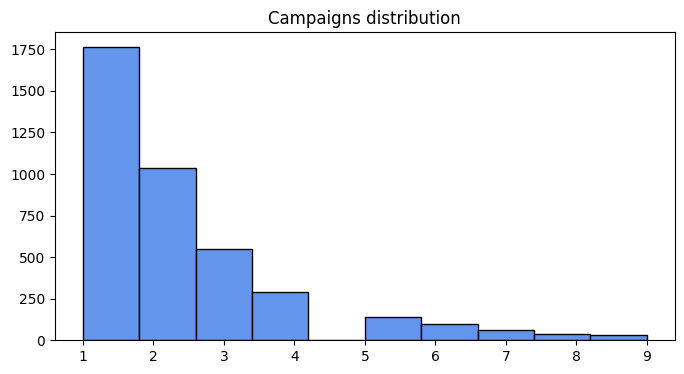

In [489]:
plt.figure(figsize=(8, 4))
plt.hist(bank.query('campaign < 10')['campaign'], color = 'cornflowerblue', edgecolor='black')
plt.title('Campaigns distribution')
plt.show()

In [527]:
bank['nr.employed'].value_counts()

nr.employed
5228.1    1626
5099.1     823
5191.0     758
5195.8     392
5076.2     164
5017.5     104
4991.6      87
4963.6      83
5008.7      60
5023.5      21
5176.3       1
Name: count, dtype: int64

## Distribution of Target 
This section identifies the distribution of consumers with respect to their final acceptance to subscribe for term deposit. We use this distribution as an input while selecting training and test data set because training and test data distribution should represent target value distribution

In [490]:
bank['y'].value_counts()

y
no     3668
yes     451
Name: count, dtype: int64

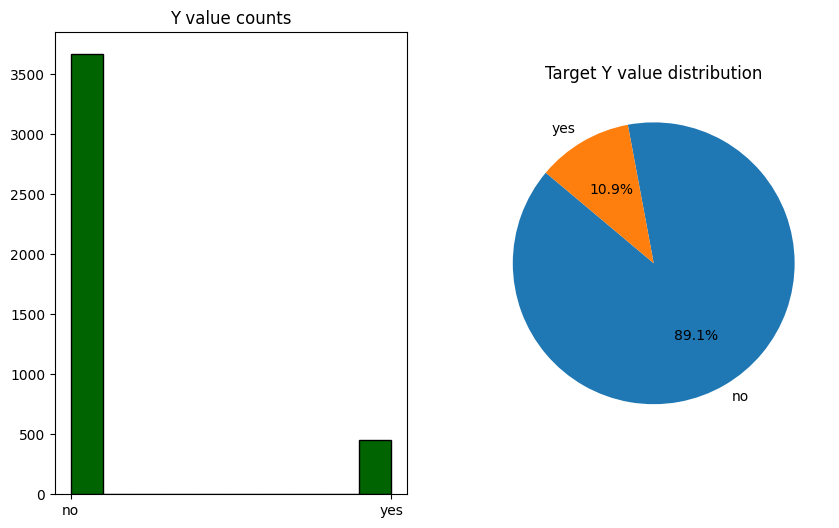

In [542]:
y_dist = bank['y'].value_counts(normalize=True)

fig, axs = plt.subplots(1, 2, figsize=(10, 6))
axs[0].hist(bank['y'], edgecolor='black', color = 'darkgreen')
axs[0].set_title('Y value counts')

axs[1].pie(y_dist, labels=y_dist.index, autopct='%1.1f%%', startangle=140)
axs[1].set_title('Target Y value distribution')
plt.show()

# Data Preparation
Data preparation phase involves encoding categorical type features, transforming them into numerical values. 


In [494]:
bank_train = bank.drop(['y'], axis =1 )
bank_numerical = bank.select_dtypes(include=['number'])
bank_categorical = bank.select_dtypes(include=['object']).drop(['y'], axis =1 )
bank_numerical.info(), bank_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   duration        4119 non-null   int64  
 2   campaign        4119 non-null   int64  
 3   pdays           4119 non-null   int64  
 4   previous        4119 non-null   int64  
 5   emp.var.rate    4119 non-null   float64
 6   cons.price.idx  4119 non-null   float64
 7   cons.conf.idx   4119 non-null   float64
 8   euribor3m       4119 non-null   float64
 9   nr.employed     4119 non-null   float64
dtypes: float64(5), int64(5)
memory usage: 321.9 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   job          4119 non-null   object
 1   marital      4119 non-null   object
 2   education    4119 non-nul

(None, None)

In [495]:
preprocessor = ColumnTransformer(
    transformers=[
        ('encode-job', OrdinalEncoder(categories = [list(bank['job'].unique())]), ['job']),
        ('encode-marital', OrdinalEncoder(categories = [list(bank['marital'].unique())]), ['marital']),
        ('encode-education', OrdinalEncoder(categories = [list(bank['education'].unique())]), ['education']),
        ('encode-default', OrdinalEncoder(categories = [list(bank['default'].unique())]), ['default']),
        ('encode-housing', OrdinalEncoder(categories = [list(bank['housing'].unique())]), ['housing']),
        ('encode-loan', OrdinalEncoder(categories = [list(bank['loan'].unique())]), ['loan']),
        ('encode-contact', OrdinalEncoder(categories = [list(bank['contact'].unique())]), ['contact']),
        ('encode-month', OrdinalEncoder(categories = [list(bank['month'].unique())]), ['month']),
        ('encode-day', OrdinalEncoder(categories = [list(bank['day_of_week'].unique())]), ['day_of_week']),
        ('encode-poutcome', OrdinalEncoder(categories = [list(bank['poutcome'].unique())]), ['poutcome'])
    ],
    remainder='passthrough'
)
bank_transformed = pd.DataFrame(preprocessor.fit_transform(bank_categorical), columns = bank_categorical.columns)
bank_transformed.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
3,1.0,0.0,0.0,0.0,2.0,1.0,1.0,1.0,0.0,0.0
4,2.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0


In [496]:
bank_preprocessed = pd.concat([bank_transformed, bank_numerical], axis = 1)
bank_preprocessed.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30,487,2,999,0,-1.8,92.893,-46.2,1.313,5099.1
1,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,39,346,4,999,0,1.1,93.994,-36.4,4.855,5191.0
2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,25,227,1,999,0,1.4,94.465,-41.8,4.962,5228.1
3,1.0,0.0,0.0,0.0,2.0,1.0,1.0,1.0,0.0,0.0,38,17,3,999,0,1.4,94.465,-41.8,4.959,5228.1
4,2.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,47,58,1,999,0,-0.1,93.200,-42.0,4.191,5195.8


## Training Data split

In [498]:
X_train, X_test, y_train, y_test = train_test_split(bank_preprocessed, bank['y'], random_state=42, 
                                                    test_size = 0.3, stratify = bank['y'])
X_train.shape

(2883, 20)

In [500]:
def train_and_validate_classifier(pipe, params, scoring):
    grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')

    # Fit GridSearchCV to the training data
    start_time = time.time()
    grid_search.fit(X_train, y_train)
    duration = time.time() - start_time

    print(f'## Classifier: {grid.best_estimator_[1]} Training Report ##')
    print("Training time: ", duration, "seconds")
    print("Best Parameters: ", grid_search.best_params_)
    print("Best training Accuracy:", grid_search.best_score_)

    # Test the model on the test set
    test_score = grid_search.score(X_test, y_test)
    print("Test Set Accuracy:", test_score)

    return grid_search, duration, grid_search.best_score_, test_score

In [501]:
def print_score(grid, pos_label = 'yes'):
    y_pred = grid.predict(X_test)
    y_prob = grid.predict_proba(X_test)[:, 1]
    
    precision = precision_score(y_test, y_pred, pos_label = pos_label)
    recall    = recall_score(y_test, y_pred, pos_label = pos_label)
    accuracy  = accuracy_score(y_test, y_pred)
    fscore    = f1_score(y_test, y_pred, pos_label = pos_label)

    print("\n")
    print(f'## Classifier: {grid.best_estimator_[1]} Performance Report ##')
    print(f'Precision is: {precision:.2f}')
    print(f'Recall    is: {recall:.2f}')
    print(f'F1 Score  is: {fscore:.2f}')
    print(f'Accuracy  is: {accuracy:.2f}')
    
    # Display the confusion matrix
    print(f'\n##Confusion Matrix##')
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = y_test.unique())
    disp.plot()
    plt.show()

    fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label = pos_label)
    roc_auc_val = roc_auc_score(y_test, y_prob)
    
    print(f'\n ##ROC CURVE##')
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_val:.2f})')
    plt.plot([0, 1], [0, 1], 'k--',color='red')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve',y=1.03)
    plt.legend(loc='lower right')
    plt.show()

    print (f'## The ROC Score : ROC-AUC is {roc_auc_val:.2f}##\n')
    return roc_auc_val

# Modeling
This section uses the following classification models to train the data and identify the efficacy of each model with respect multiple scoring strategies, criteria. This section can be used to compare and contrast each model with respect to their efficacy and performance.

With respect to each model, we identify the confusion matrix which presnts True Positive, Fale Positive, False Negative and True Negative factors. We also compute the training duration for each model and compare.

We also provide a visual represention of ROC curve and ROC curve Area which effectively identify the Model effectiveness.

### Classification Models we cover in this section:
- K-Nearest Neighbor Classification
- Logistic Regression
- Decision Tree Classifier
- SVM Classifier


## Classifier: KNeighborsClassifier(metric='euclidean', n_neighbors=9, weights='distance') Training Report ##
Training time:  1.1604020595550537 seconds
Best Parameters:  {'knn__metric': 'euclidean', 'knn__n_neighbors': 9, 'knn__weights': 'distance'}
Best training Accuracy: 0.9021862362796071
Test Set Accuracy: 0.9004854368932039


## Classifier: KNeighborsClassifier(metric='euclidean', n_neighbors=9, weights='distance') Performance Report ##
Precision is: 0.60
Recall    is: 0.27
F1 Score  is: 0.37
Accuracy  is: 0.90

##Confusion Matrix##
[[1077   24]
 [  99   36]]


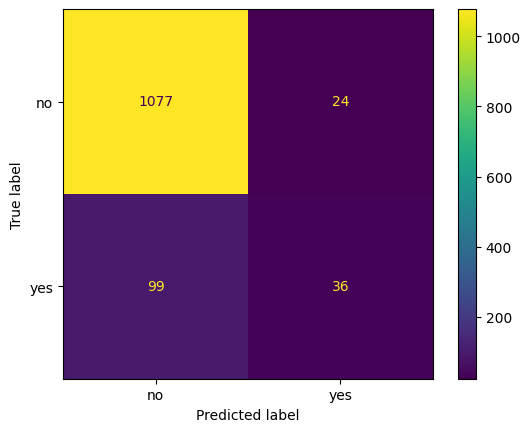


 ##ROC CURVE##


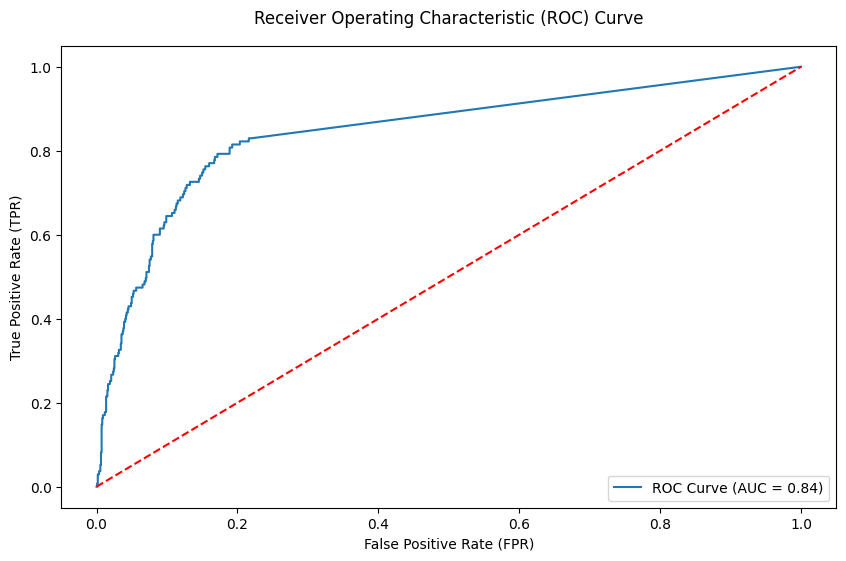

## The ROC Score : ROC-AUC is 0.84##



In [521]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Standardize the data
    ('knn', KNeighborsClassifier())  # Step 2: K-Nearest Neighbors classifier
])

# Define the parameter grid
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9],  # Different values of k
    'knn__weights': ['uniform', 'distance'],  # Weight function
    'knn__metric': ['euclidean', 'manhattan']  # Distance metric
}

grid, duration, train_score, test_score = train_and_validate_classifier (pipeline, param_grid, 'recall')
roc_auc = print_score(grid)
score['knn'] = (duration, train_score, test_score, roc_auc)

## Classifier: KNeighborsClassifier(metric='euclidean', n_neighbors=7, weights='distance') Training Report ##
Training time:  5.315768003463745 seconds
Best Parameters:  {'logreg__C': 1, 'logreg__l1_ratio': 0.5, 'logreg__penalty': 'l2', 'logreg__solver': 'saga'}
Best training Accuracy: 0.9174495715386097
Test Set Accuracy: 0.9053398058252428


## Classifier: LogisticRegression(C=1, l1_ratio=0.5, max_iter=1000, solver='saga') Performance Report ##
Precision is: 0.62
Recall    is: 0.34
F1 Score  is: 0.44
Accuracy  is: 0.91

##Confusion Matrix##
[[1073   28]
 [  89   46]]


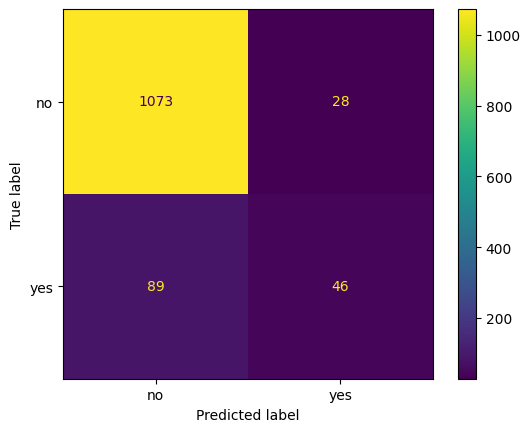


 ##ROC CURVE##


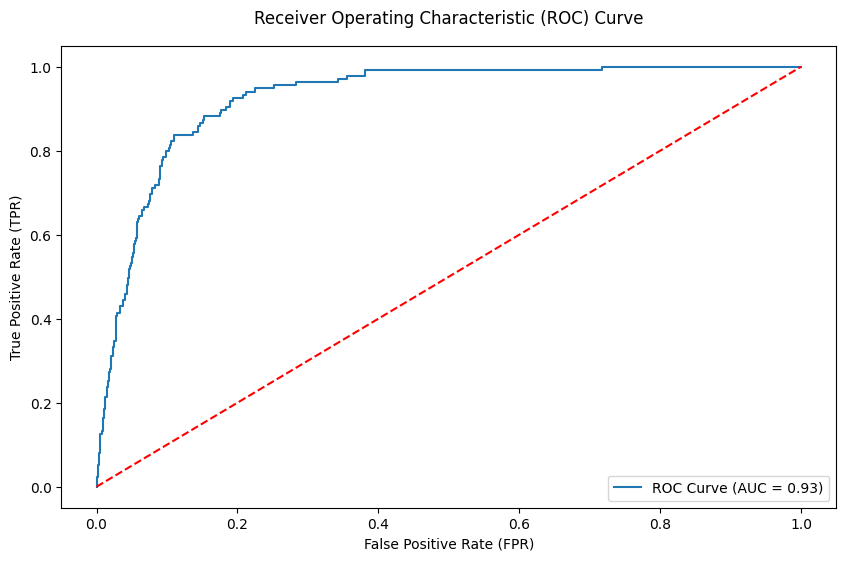

## The ROC Score : ROC-AUC is 0.93##



In [503]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Standardize the data
    ('logreg', LogisticRegression(max_iter=1000))  # Step 2: Logistic Regression as classifier
])

# Define the parameter grid
param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'logreg__penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Regularization type
    'logreg__solver': ['saga'],  # Solver to use; 'saga' supports elasticnet
    'logreg__l1_ratio': [0.5]  # Only relevant if 'elasticnet' is used as penalty
}

grid, duration, train_score, test_score = train_and_validate_classifier (pipeline, param_grid, 'recall')
roc_auc = print_score(grid)
score['logreg'] = (duration, train_score, test_score, roc_auc)

## Classifier: LogisticRegression(C=1, l1_ratio=0.5, max_iter=1000, solver='saga') Training Report ##
Training time:  5.72299599647522 seconds
Best Parameters:  {'dtc__criterion': 'gini', 'dtc__max_depth': 10, 'dtc__max_features': 'sqrt', 'dtc__min_samples_leaf': 1, 'dtc__min_samples_split': 10}
Best training Accuracy: 0.908089014057385
Test Set Accuracy: 0.9037216828478964


## Classifier: DecisionTreeClassifier(max_depth=10, max_features='sqrt', min_samples_split=10) Performance Report ##
Precision is: 0.59
Recall    is: 0.41
F1 Score  is: 0.48
Accuracy  is: 0.90

##Confusion Matrix##
[[1062   39]
 [  80   55]]


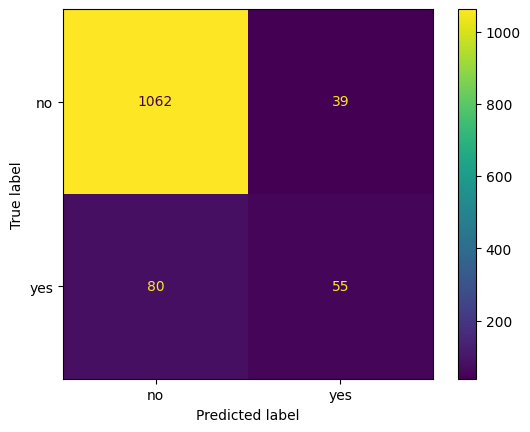


 ##ROC CURVE##


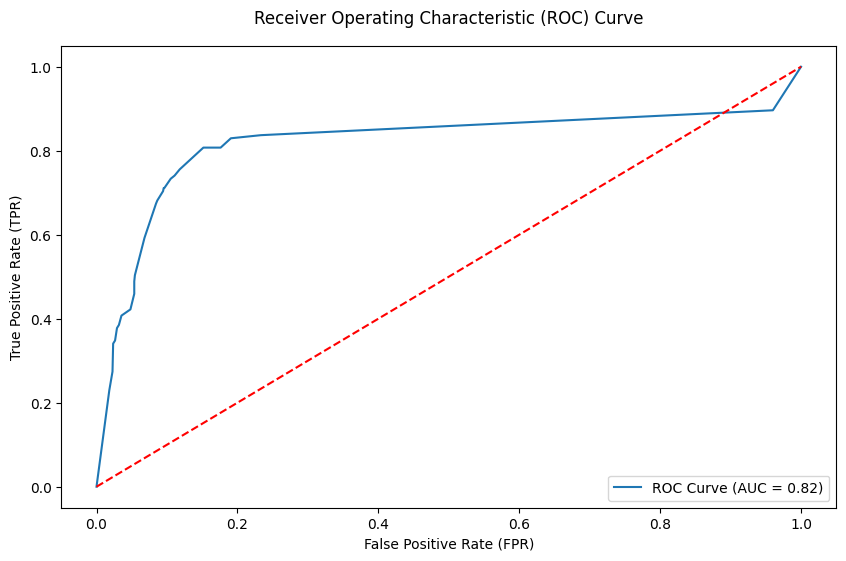

## The ROC Score : ROC-AUC is 0.82##



In [504]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Standardize the data
    ('dtc', DecisionTreeClassifier())  # Step 2: Decision Tree as classifier
])

# Define the parameter grid
param_grid = {
    'dtc__criterion': ['gini', 'entropy'],  # Measure used for splitting
    'dtc__max_depth': [None, 10, 20, 30],   # Maximum depth of the tree
    'dtc__min_samples_split': [2, 5, 10],   # Minimum number of samples required to split an internal node
    'dtc__min_samples_leaf': [1, 2, 4],     # Minimum number of samples required to be at a leaf node
    'dtc__max_features': [None, 'sqrt', 'log2']  # Number of features to consider when looking for the best split
}

grid, duration, train_score, test_score = train_and_validate_classifier (pipeline, param_grid, 'recall')
roc_auc = print_score(grid)
score['dtc'] = (duration, train_score, test_score, roc_auc)

## Classifier: DecisionTreeClassifier(max_depth=10, max_features='sqrt', min_samples_split=10) Training Report ##
Training time:  411.4867489337921 seconds
Best Parameters:  {'svc__C': 10, 'svc__degree': 2, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}
Best training Accuracy: 0.91397975640285
Test Set Accuracy: 0.9053398058252428


## Classifier: SVC(C=10, degree=2, kernel='linear', probability=True) Performance Report ##
Precision is: 0.63
Recall    is: 0.33
F1 Score  is: 0.43
Accuracy  is: 0.91

##Confusion Matrix##
[[1075   26]
 [  91   44]]


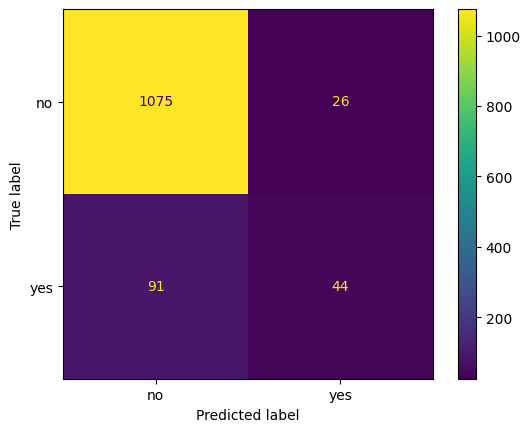


 ##ROC CURVE##


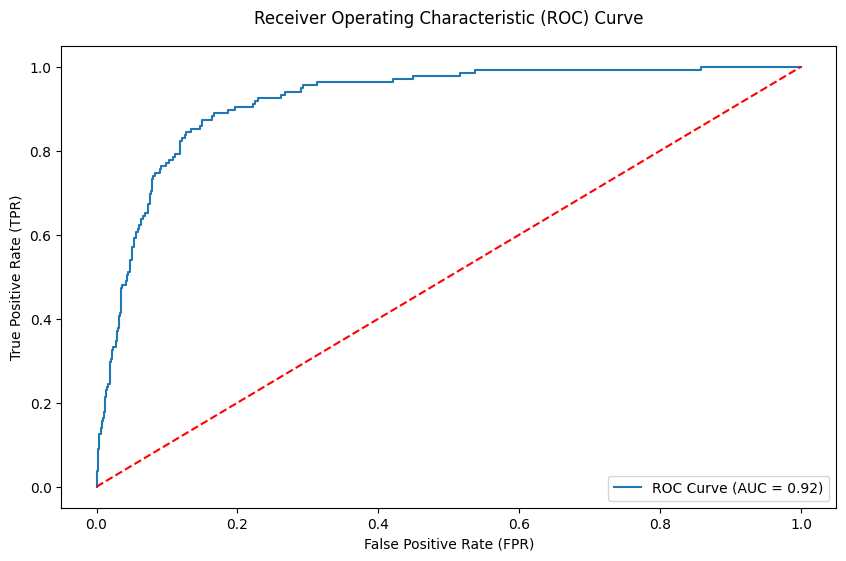

## The ROC Score : ROC-AUC is 0.92##



In [505]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Standardize the data
    ('svc', SVC(probability=True))  # Step 2: SVC as classifier
])

param_grid = {
    'svc__C': [0.1, 1, 10, 100],  # Regularization parameter
    'svc__kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    #'svc__kernel': ['rbf'],  # Kernel type
    'svc__gamma': ['scale', 'auto'],  # Kernel coefficient
    'svc__degree': [2, 3, 4]  # Degree of the polynomial kernel function (only relevant for 'poly' kernel)
}

grid, duration, train_score, test_score = train_and_validate_classifier (pipeline, param_grid, 'recall')
roc_auc = print_score(grid)
score['svc'] = (duration, train_score, test_score, roc_auc)

# Model Performance Conclusion
In this section, we compare each classification model with respect to training compute budget, training accuracy, validation accuracy and Model overall effectiveness (ROC AUC value).

We reprent the performance values as data frame down below. Here are the conclusions based on measured metrics.
- Kernel based classifier(SVC) consumes highest computational budget (100 times more)
- Logistic Regression has the best training and validation accuracy, followed by SVC.
- Logistic Regression has the best AUC value as well, followed by SVC.

In [522]:
score_df = pd.DataFrame(score).T
score_df.columns = ['duration', 'training_accuracy', 'test_accuracy', 'AUC']
score_df

,duration,training_accuracy,test_accuracy,AUC
knn,1.160402,0.902186,0.900485,0.844421
logreg,5.315768,0.917450,0.905340,0.926592
dtc,5.722996,0.908089,0.903722,0.819211
svc,411.486749,0.913980,0.905340,0.918875


# Evaluation & Optimization
This section talks about different observations on how some features impact the target. This in turn may answer questions about effectiveness of campaign with respect to campaign, consumer and macro economic factors.

First observation tries to answer if multiple campaigns to single consumer effective in convincing the consumer to subscribe to the term desposit.

### Number of compaigns Vs Subscription
This section visually reprents how repeated contact of bank representative to consumers affect the success rate of consumer subscription. As the visual representation presents, the success rate increases as the number of campaigns increase, but eventually it starts wane. This represents consume fatigue with respect to campaign. 

In [491]:
grouped = bank.groupby(['previous', 'y']).size().unstack(fill_value=0)
grouped

y,no,yes
previous,,
0,3231,292
1,376,99
2,46,32
3,10,15
4,4,10
5,0,2
6,1,1


In [559]:
normalized_by_rows = grouped.div(grouped.sum(axis=1), axis=0)
normalized_by_rows.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   no      7 non-null      float64
 1   yes     7 non-null      float64
dtypes: float64(2)
memory usage: 168.0 bytes


In [560]:
normalized_by_rows.index

Index([0, 1, 2, 3, 4, 5, 6], dtype='int64', name='previous')

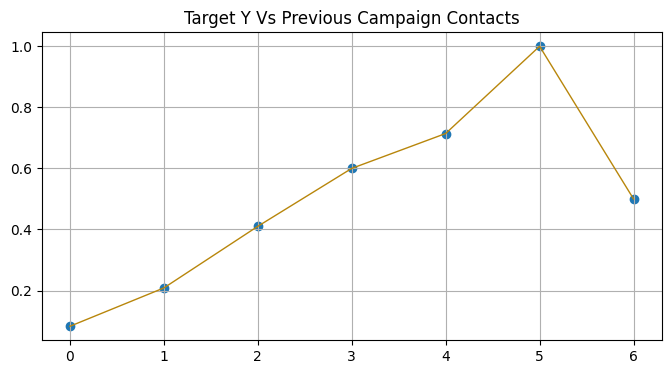

In [493]:
plt.figure(figsize=(8, 4))
plt.scatter(normalized_by_rows.index, normalized_by_rows['yes'], marker='o')
plt.plot(normalized_by_rows.index, normalized_by_rows['yes'], color='darkgoldenrod', linestyle='-', linewidth=1)
plt.grid(True)
plt.title('Target Y Vs Previous Campaign Contacts')
plt.show()

### How married, employed and housed respond to campaigns
This section dvelves into a section of consumers who are settled i.e consumers who are employed (or retired). We divide this group into multiple sub groups like married, divorced, home ownership and see how these subgroups respond to campaigns.

Based on the visual analysis and sorted values, it seems the following groups have almost 50% of chance to accept the Term Deposit.

- Married, in Management, unknown home ownership
- Home owners, in administrative jobs, marital status unknown
- Retired, single and unkown home ownership

In [600]:
bank_cl = bank.query('job not in ["unemployed", "unknown", "student"]')
settled = bank_cl.groupby(['job', 'marital', 'housing','y']).size().unstack(fill_value=0)
settled

y                             no  yes
job        marital  housing          
admin.     divorced no        37    7
                    yes       60    8
           married  no       204   27
                    unknown   10    0
                    yes      234   38
...                          ...  ...
technician married  yes      176   20
           single   no        69   10
                    unknown    4    1
                    yes      121   23
           unknown  yes        1    0

[82 rows x 2 columns]

In [601]:
normalized_by_rows = settled.div(settled.sum(axis=1), axis=0)
normalized_by_rows.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 82 entries, ('admin.', 'divorced', 'no') to ('technician', 'unknown', 'yes')
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   no      82 non-null     float64
 1   yes     82 non-null     float64
dtypes: float64(2)
memory usage: 1.8+ KB


In [606]:
normalized_by_rows.sort_values(by='yes', ascending=False).head(10)

y                                  no       yes
job        marital  housing                    
management married  unknown  0.500000  0.500000
admin.     unknown  yes      0.500000  0.500000
retired    single   no       0.500000  0.500000
housemaid  divorced no       0.666667  0.333333
retired    divorced yes      0.687500  0.312500
           married  no       0.732143  0.267857
technician married  unknown  0.750000  0.250000
retired    married  unknown  0.750000  0.250000
                    yes      0.754098  0.245902
admin.     single   unknown  0.800000  0.200000

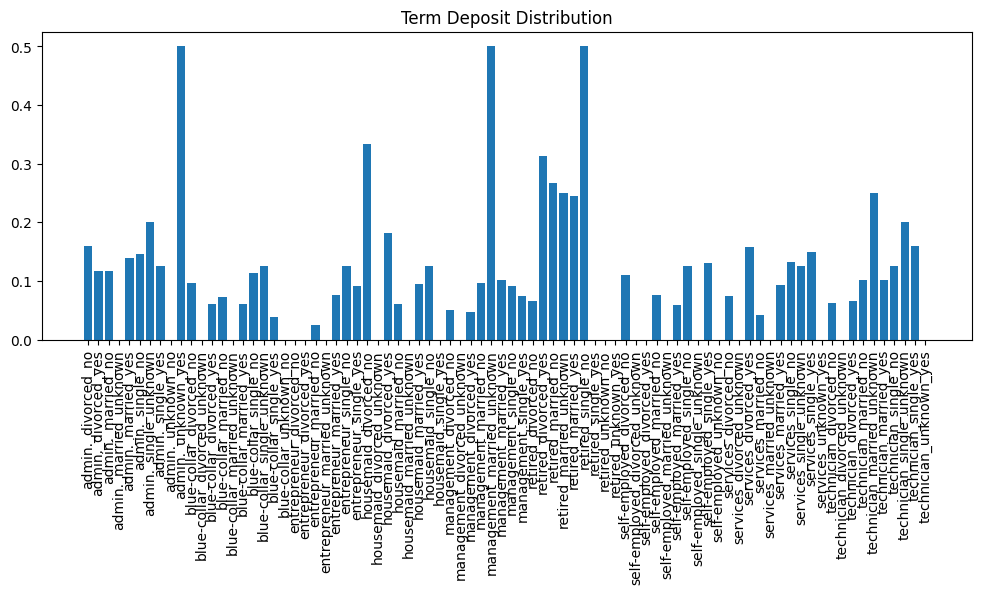

In [605]:
plt.figure(figsize=(12, 4))
index = normalized_by_rows.index.map(lambda x: '_'.join([str(item) for item in x]))
plt.bar(index, normalized_by_rows['yes'])
plt.xticks(ticks=index, labels=index, rotation=90)
# Add a title
plt.title('Term Deposit Distribution')

# Show the plot
plt.show()

# Optimization
Optimization within Evaluation phase involves identifying the most prominent features or a combination of features so that we can eliminate least important features and train the models and then compare the efficacy of these models with respect to training with full set data.

Goal of optimizating the training process is to reduce the computational budget. Computational budget raises exponentional with respect to the number of features. Hence reducing the number of features is important step in feature engineering.

## Feature Selection and Minimization


There are multiple techniques and models in reducing feature complexity. We use Logistic Regression with regularization to idetify the features that are important. It returns coefficients for each feature and we remove the features that are least important and retrain the classification models and compare the effectiveness of each model with reduced feature data.

In [506]:
pipe = Pipeline([('scaler', StandardScaler()),
                  ('regression', LogisticRegression(penalty='l1', solver='liblinear'))])

pipe.fit(X_train, y_train)
coef_dict = dict(zip(list(X_train.columns), pipe.named_steps['regression'].coef_[0]))
sorted_keys = sorted(coef_dict, key=coef_dict.get, reverse = True)
sorted_keys

['duration',
 'cons.price.idx',
 'cons.conf.idx',
 'nr.employed',
 'month',
 'job',
 'default',
 'housing',
 'previous',
 'day_of_week',
 'marital',
 'loan',
 'education',
 'age',
 'poutcome',
 'campaign',
 'euribor3m',
 'pdays',
 'contact',
 'emp.var.rate']

In [507]:
percents = {key: value * 100 for key, value in coef_dict.items()}
percents_sorted = dict(sorted(percents.items(), key=lambda item: item[1], reverse = True))
percents_sorted

{'duration': 131.51735551913544,
 'cons.price.idx': 85.27499178437861,
 'cons.conf.idx': 41.106545596495074,
 'nr.employed': 14.61251948551228,
 'month': 13.547995096578724,
 'job': 7.678500520024076,
 'default': 4.463044495162124,
 'housing': 1.7580705036690403,
 'previous': 1.411542010533146,
 'day_of_week': 1.1339736865520846,
 'marital': 0.027295784288403648,
 'loan': -0.8716462550394858,
 'education': -3.2098083179953605,
 'age': -7.9766809342444205,
 'poutcome': -12.367003029724794,
 'campaign': -18.995237570932755,
 'euribor3m': -35.61227338185515,
 'pdays': -36.503429610066625,
 'contact': -38.14982815967915,
 'emp.var.rate': -121.56510927684279}

# Visual Representation Of Prominent Features

This section visually represents how the four most prominent features correlated to the target value (Term Deposit - Yes). This is a 2x2 tile plot visually represent how the following features are correlated to Term Deposit acceptence.
- Duration
- Consumer Price Index
- Consumer Confidence Index
- Number of Bank Employees

Duration field represent how long a bank representative contacted to an individual subscriber. As the visual representation suggests, the likelyhood a consumer subscribing to a term deposit increase as the number of minutes an representative talked that consumer increases. 

As for the other three attributes, visual representation doesn't give a clear trend.

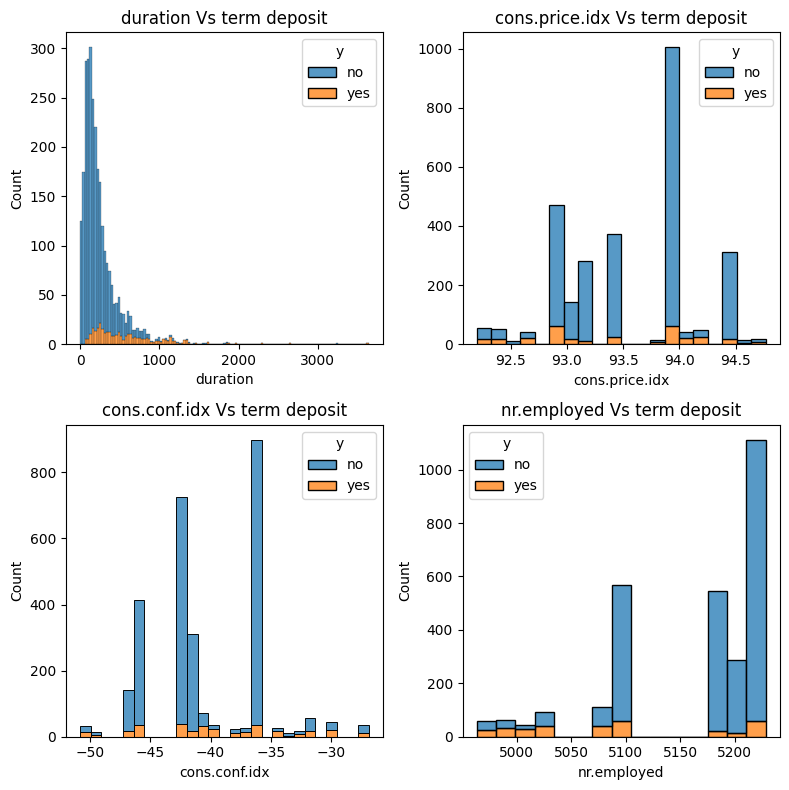

In [508]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
temp = pd.concat([X_train, y_train], axis = 1)

sns.histplot(data = temp , x='duration', hue='y', multiple='stack', edgecolor='black', ax=axs[0, 0])
axs[0, 0].set_title('duration Vs term deposit')

sns.histplot(data = temp , x='cons.price.idx', hue='y', multiple='stack', edgecolor='black', ax=axs[0, 1])
axs[0, 1].set_title('cons.price.idx Vs term deposit')

sns.histplot(data = temp , x='cons.conf.idx', hue='y', multiple='stack', edgecolor='black', ax=axs[1, 0])
axs[1, 0].set_title('cons.conf.idx Vs term deposit')

sns.histplot(data = temp , x='nr.employed', hue='y', multiple='stack', edgecolor='black', ax=axs[1, 1])
axs[1, 1].set_title('nr.employed Vs term deposit')

# Adjust layout
plt.tight_layout()
# Show the plot
plt.show()

In [509]:
bank_r = bank.drop(['loan', 'education', 'age', 'poutcome', 'campaign', 'euribor3m', 'pdays', 'contact', 'emp.var.rate'], axis = 1)
bank_r.head()

,job,marital,default,housing,month,day_of_week,duration,previous,cons.price.idx,cons.conf.idx,nr.employed,y
0,blue-collar,married,no,yes,may,fri,487,0,92.893,-46.2,5099.1,no
1,services,single,no,no,may,fri,346,0,93.994,-36.4,5191.0,no
2,services,married,no,yes,jun,wed,227,0,94.465,-41.8,5228.1,no
3,services,married,no,unknown,jun,fri,17,0,94.465,-41.8,5228.1,no
4,admin.,married,no,yes,nov,mon,58,0,93.200,-42.0,5195.8,no


### Elimiate the least Prominent feature and evaluate models again

In [510]:
bank_r_train = bank_r.drop(['y'], axis =1 )
bank_r_numerical = bank_r_train.select_dtypes(include=['number'])
bank_r_categorical = bank_r_train.select_dtypes(include=['object'])
bank_r_numerical.info(), bank_r_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   duration        4119 non-null   int64  
 1   previous        4119 non-null   int64  
 2   cons.price.idx  4119 non-null   float64
 3   cons.conf.idx   4119 non-null   float64
 4   nr.employed     4119 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 161.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   job          4119 non-null   object
 1   marital      4119 non-null   object
 2   default      4119 non-null   object
 3   housing      4119 non-null   object
 4   month        4119 non-null   object
 5   day_of_week  4119 non-null   object
dtypes: object(6)
memory usage: 193.2+ KB


(None, None)

In [511]:
preprocessor = ColumnTransformer(
    transformers=[
        ('encode-job', OrdinalEncoder(categories = [list(bank['job'].unique())]), ['job']),
        ('encode-marital', OrdinalEncoder(categories = [list(bank['marital'].unique())]), ['marital']),
        ('encode-default', OrdinalEncoder(categories = [list(bank['default'].unique())]), ['default']),
        ('encode-housing', OrdinalEncoder(categories = [list(bank['housing'].unique())]), ['housing']),
        ('encode-month', OrdinalEncoder(categories = [list(bank['month'].unique())]), ['month']),
        ('encode-day', OrdinalEncoder(categories = [list(bank['day_of_week'].unique())]), ['day_of_week']),
    ],
    remainder='passthrough'
)
bank_r_transformed = pd.DataFrame(preprocessor.fit_transform(bank_r_categorical), columns = bank_r_categorical.columns)
bank_r_preprocessed = pd.concat([bank_r_transformed, bank_r_numerical], axis = 1)
bank_r_preprocessed.head()

,job,marital,default,housing,month,day_of_week,duration,previous,cons.price.idx,cons.conf.idx,nr.employed
0,0.0,0.0,0.0,0.0,0.0,0.0,487,0,92.893,-46.2,5099.1
1,1.0,1.0,0.0,1.0,0.0,0.0,346,0,93.994,-36.4,5191.0
2,1.0,0.0,0.0,0.0,1.0,1.0,227,0,94.465,-41.8,5228.1
3,1.0,0.0,0.0,2.0,1.0,0.0,17,0,94.465,-41.8,5228.1
4,2.0,0.0,0.0,0.0,2.0,2.0,58,0,93.200,-42.0,5195.8


In [512]:
X_train, X_test, y_train, y_test = train_test_split(bank_r_preprocessed, bank['y'], random_state=42, 
                                                    test_size = 0.3, stratify = bank['y'])
X_train.shape

(2883, 11)

## Classifier: SVC(C=1, degree=2, probability=True) Training Report ##
Training time:  1.1333630084991455 seconds
Best Parameters:  {'knn__metric': 'euclidean', 'knn__n_neighbors': 9, 'knn__weights': 'distance'}
Best training Accuracy: 0.9021862362796071
Test Set Accuracy: 0.9004854368932039


## Classifier: KNeighborsClassifier(metric='euclidean', n_neighbors=9, weights='distance') Performance Report ##
Precision is: 0.60
Recall    is: 0.27
F1 Score  is: 0.37
Accuracy  is: 0.90

##Confusion Matrix##
[[1077   24]
 [  99   36]]


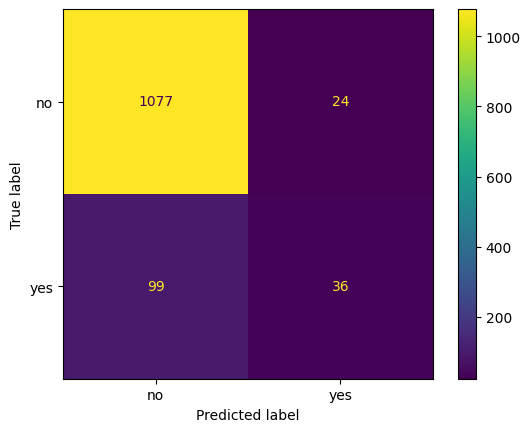


 ##ROC CURVE##


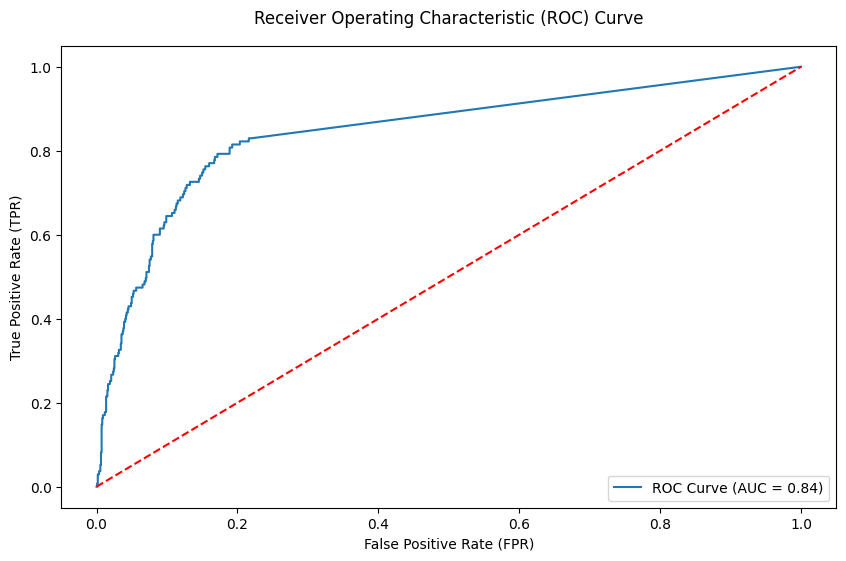

## The ROC Score : ROC-AUC is 0.84##



In [519]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Standardize the data
    ('knn', KNeighborsClassifier())  # Step 2: K-Nearest Neighbors classifier
])

# Define the parameter grid
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9],  # Different values of k
    'knn__weights': ['uniform', 'distance'],  # Weight function
    'knn__metric': ['euclidean', 'manhattan']  # Distance metric
}

grid, duration, train_score, test_score = train_and_validate_classifier (pipeline, param_grid, 'recall')
roc_auc = print_score(grid)
score_r['knn'] = (duration, train_score, test_score, roc_auc)

## Classifier: KNeighborsClassifier(metric='euclidean', n_neighbors=9, weights='distance') Training Report ##
Training time:  0.5148582458496094 seconds
Best Parameters:  {'logreg__C': 0.1, 'logreg__l1_ratio': 0.5, 'logreg__penalty': 'l2', 'logreg__solver': 'saga'}
Best training Accuracy: 0.915016007124976
Test Set Accuracy: 0.901294498381877


## Classifier: LogisticRegression(C=0.1, l1_ratio=0.5, max_iter=1000, solver='saga') Performance Report ##
Precision is: 0.60
Recall    is: 0.28
F1 Score  is: 0.38
Accuracy  is: 0.90

##Confusion Matrix##
[[1076   25]
 [  97   38]]


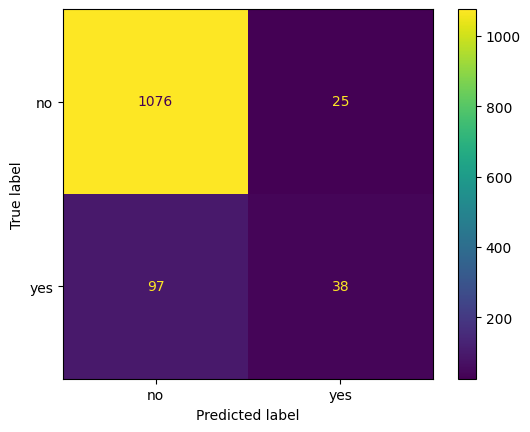


 ##ROC CURVE##


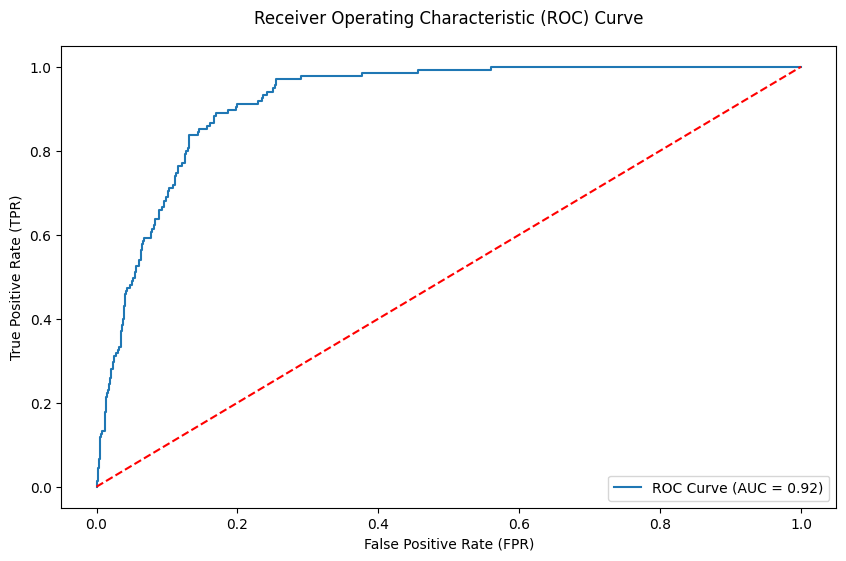

## The ROC Score : ROC-AUC is 0.92##



In [514]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Standardize the data
    ('logreg', LogisticRegression(max_iter=1000))  # Step 2: Logistic Regression as classifier
])

# Define the parameter grid
param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'logreg__penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Regularization type
    'logreg__solver': ['saga'],  # Solver to use; 'saga' supports elasticnet
    'logreg__l1_ratio': [0.5]  # Only relevant if 'elasticnet' is used as penalty
}

grid, duration, train_score, test_score = train_and_validate_classifier (pipeline, param_grid, 'recall')
roc_auc = print_score(grid)
score_r['logreg'] = (duration, train_score, test_score, roc_auc)

## Classifier: LogisticRegression(C=0.1, l1_ratio=0.5, max_iter=1000, solver='saga') Training Report ##
Training time:  4.597386121749878 seconds
Best Parameters:  {'dtc__criterion': 'entropy', 'dtc__max_depth': 10, 'dtc__max_features': 'log2', 'dtc__min_samples_leaf': 1, 'dtc__min_samples_split': 5}
Best training Accuracy: 0.9039253562487964
Test Set Accuracy: 0.8932038834951457


## Classifier: DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='log2',
                       min_samples_split=5) Performance Report ##
Precision is: 0.52
Recall    is: 0.34
F1 Score  is: 0.41
Accuracy  is: 0.89

##Confusion Matrix##
[[1058   43]
 [  89   46]]


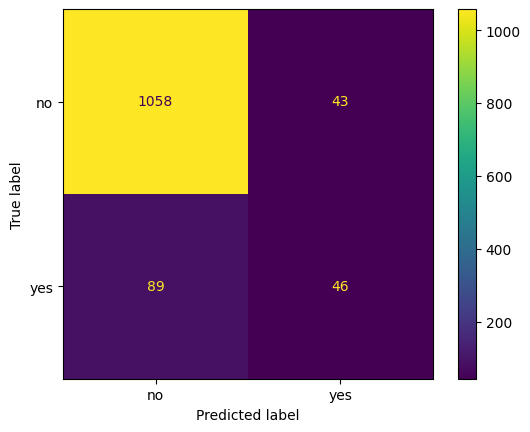


 ##ROC CURVE##


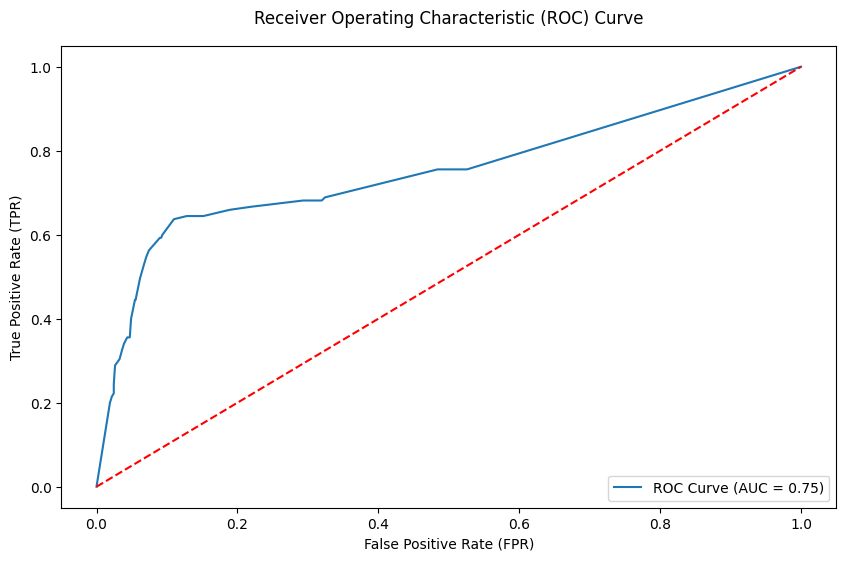

## The ROC Score : ROC-AUC is 0.75##



In [515]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Standardize the data
    ('dtc', DecisionTreeClassifier())  # Step 2: Decision Tree as classifier
])

# Define the parameter grid
param_grid = {
    'dtc__criterion': ['gini', 'entropy'],  # Measure used for splitting
    'dtc__max_depth': [None, 10, 20, 30],   # Maximum depth of the tree
    'dtc__min_samples_split': [2, 5, 10],   # Minimum number of samples required to split an internal node
    'dtc__min_samples_leaf': [1, 2, 4],     # Minimum number of samples required to be at a leaf node
    'dtc__max_features': [None, 'sqrt', 'log2']  # Number of features to consider when looking for the best split
}

grid, duration, train_score, test_score = train_and_validate_classifier (pipeline, param_grid, 'recall')
roc_auc = print_score(grid)
score_r['dtc'] = (duration, train_score, test_score, roc_auc)

## Classifier: DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='log2',
                       min_samples_split=5) Training Report ##
Training time:  197.49251985549927 seconds
Best Parameters:  {'svc__C': 1, 'svc__degree': 2, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
Best training Accuracy: 0.9125884604274986
Test Set Accuracy: 0.9085760517799353


## Classifier: SVC(C=1, degree=2, probability=True) Performance Report ##
Precision is: 0.67
Recall    is: 0.33
F1 Score  is: 0.44
Accuracy  is: 0.91

##Confusion Matrix##
[[1079   22]
 [  91   44]]


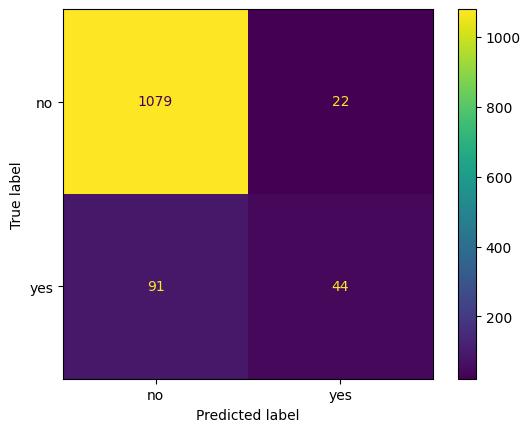


 ##ROC CURVE##


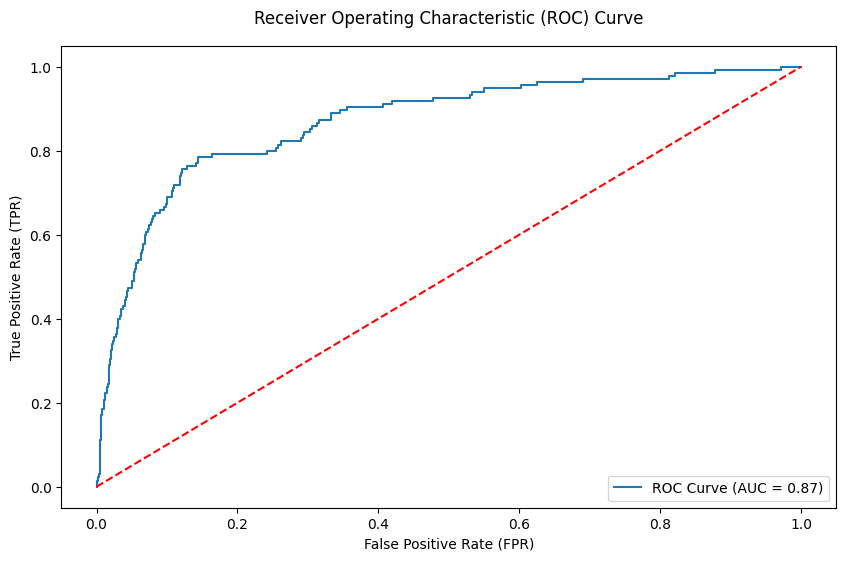

## The ROC Score : ROC-AUC is 0.87##



In [516]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Standardize the data
    ('svc', SVC(probability=True))  # Step 2: SVC as classifier
])

param_grid = {
    'svc__C': [0.1, 1, 10, 100],  # Regularization parameter
    'svc__kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    #'svc__kernel': ['rbf'],  # Kernel type
    'svc__gamma': ['scale', 'auto'],  # Kernel coefficient
    'svc__degree': [2, 3, 4]  # Degree of the polynomial kernel function (only relevant for 'poly' kernel)
}

grid, duration, train_score, test_score = train_and_validate_classifier (pipeline, param_grid, 'recall')
roc_auc = print_score(grid)
score_r['svc'] = (duration, train_score, test_score, roc_auc)

## Model Performance with reduced features -  Conclusion
We compare the compute complexity between full-feature data set training vs reduced feature data set.

With the reduced feature set, Here are the conclusions based on measured metrics.
- Kernel based classifier(SVC) consumes highest computational budget (50 times more)
- Logistic Regression has the best training and validation accuracy, followed by SVC.
- Logistic Regression has the best AUC value as well, followed by SVC.

With the reduced feature set, compute budget improves two folds.

In [520]:
score_r_df = pd.DataFrame(score_r).T
score_r_df.columns = ['duration', 'training_accuracy', 'test_accuracy', 'AUC']
score_r_df

,duration,training_accuracy,test_accuracy,AUC
knn,1.133363,0.902186,0.900485,0.844421
logreg,0.514858,0.915016,0.901294,0.917994
dtc,4.597386,0.903925,0.893204,0.750143
svc,197.492520,0.912588,0.908576,0.868860


In [609]:
score_duration_df = pd.concat([score_df['duration'], score_r_df['duration']], axis = 1)
score_duration_df.columns = ['full', 'reduced']
score_duration_df

,full,reduced
knn,1.160402,1.133363
logreg,5.315768,0.514858
dtc,5.722996,4.597386
svc,411.486749,197.492520


Text(0.5, 1.0, 'Bar Chart of Duration Full Vs Reduced Features')

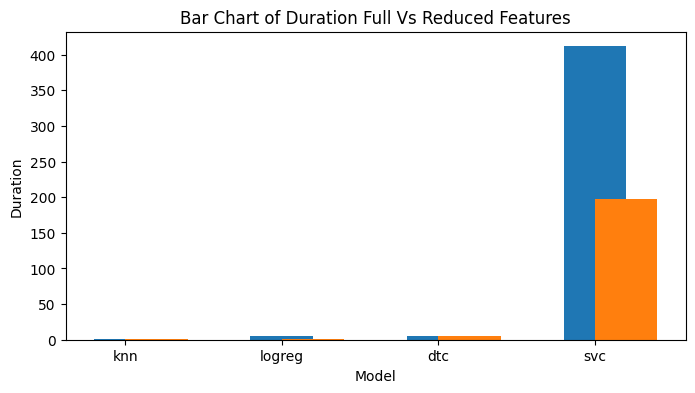

In [612]:
plt.figure(figsize=(8, 4))
plt.bar(score_duration_df.index, score_duration_df['full'], width=0.4, label='Full', align='center')
plt.bar(score_duration_df.index, score_duration_df['reduced'], width=0.4, label='Reduced', align='edge')
plt.xticks(ticks=score_duration_df.index, labels=score_duration_df.index)

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Duration')
plt.title('Bar Chart of Duration Full Vs Reduced Features')